# Phylogenetic tree of the Sars-Cov-2 sequencing data

## Downloading the data

We downloaded the raw sequencing data and the associated metadata of 733 isolates (all the ones available on Mar 17) from the GISAID web site. This data set includes:
- 98 isolates from the US 
- 635 isolates from other countries/sources


## Generating a sequence alignment

We use [MAFFT](https://mafft.cbrc.jp/alignment/software/) to align all sequences:

In [8]:
system("mafft --auto data/gisaid_cov2020_sequences_filtered.fasta > data/gisaid_cov2020_sequences_filtered_ali.fasta")

## Phylogenetic tree reconstruction
We load the alignment (converting it to `DNAbin` format, which is suitable to perform fast caculations. The `adegenet` provides a function to do this) and calculate a distance matrix (using the `ape` package):

In [1]:
# we load the alignment we just saved
library(adegenet)
library(ape)
ali_reloaded = fasta2DNAbin(file="data/gisaid_cov2020_sequences_filtered_ali.fasta")

# we calculate the distance between the sequences
d_mat = dist.dna(ali_reloaded)

Loading required package: ade4

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 


   /// adegenet 2.1.2 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()






 Converting FASTA alignment into a DNAbin object... 


 Finding the size of a single genome... 


 genome size is: 29,980 nucleotides 

( 501  lines per genome )

 Importing sequences... 
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

We generate a tree and we root it (using the oldest isolate present in our datast /  considering the sampling date):

In [85]:
tree = bionj(d_mat)
rtree=root(tree, outgroup="hCoV-19/Wuhan/WIV04/2019|EPI_ISL_402124")

In [86]:
library(magrittr)
rtree$tip.label = rtree$tip %>% 
gsub(pattern = "hCoV-19/", replacement = "") %>% 
gsub(pattern = "\\|[A-Z0-9_]+", replacement = "",perl = TRUE) %>%
gsub(pattern = "\\/", replacement = " \\/ ",perl = TRUE)



We load the metadata about the isolation countries, we create two categories ("USA", "other") and we display the tree using the `ggtree` package:

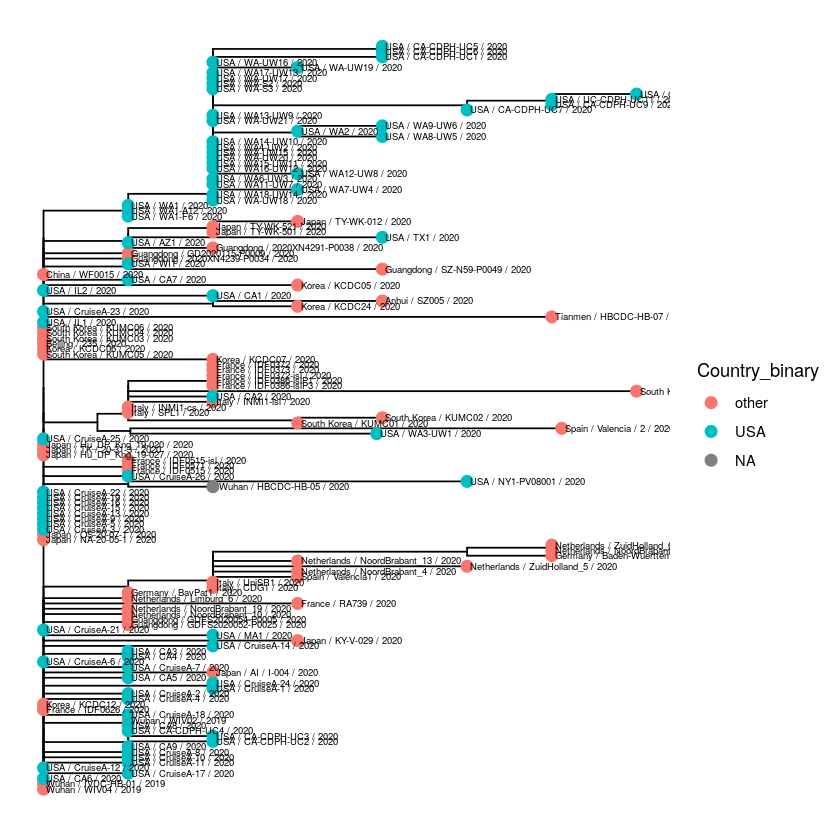

In [91]:
# loading metadata
md = read.csv("data/metadata/geo_loc.tsv",sep="\t")
md$Country_binary = ifelse(md$Country == "USA","USA","other")
md_sel=md[,c("Isolate_short_name","Country_binary")]

# displaying tree
library(ggtree)
g=ggtree(rtree) 
g %<+% md_sel + geom_tippoint(aes(color=Country_binary), size=3) + geom_tiplab(size=2)
g_final = g %<+% md_sel + geom_tippoint(aes(color=Country_binary), size=3) + geom_tiplab(size=3)
ggsave("out/tree_us_vs_other_isolates.pdf",g_final, height = 20 , width = 30)
 

Although the image in the notebook will be a bit difficult to read, the `.png` you can download/open the `.png` image we generated (`out/tree_us_vs_other_isolates.png`) with your favorite image viewer.

## Questions
- Can you list one or more examples of community spread?

## Generating a sequence alignment

We load the packages `seqinr` and `msa`. The former one helps us to work with sequence data, while the latter helps us to compute sequence alignments.
Then we can load the `.fasta` file with the sequences of Sars-CoV-2:

In [9]:
library("seqinr")
library("msa")

all_sequences = readDNAStringSet("data/all.fasta")

we perform the sequence alignment with [Muscle](https://en.wikipedia.org/wiki/MUSCLE_(alignment_software)) (takes a long time):

In [ ]:
alignment = msa(all_sequences, "Muscle")

and we save the alignment:

In [3]:
# we need to convert the alignment to a format that seqinr can manage
alignment_seqinr = msaConvert(alignment, "seqinr::alignment")

# we save the alignment in a fasta file 
write.fasta(as.list(alignment_seqinr$seq),alignment_seqinr$nam,file="data/sars_cov2_ali.fasta",as.string=TRUE)

ERROR: Error in is(x, "MultipleAlignment"): object 'alignment' not found


## Phylogenetic tree reconstruction
We load the alignment (converting it to `DNAbin` format, which is suitable to perform fast caculations. The `adegenet` provides a function to do this) and calculate a distance matrix (using the `ape` package):

In [1]:
# we load the alignment we just saved
library(adegenet)
library(ape)
ali_reloaded = fasta2DNAbin(file="data/sars_cov2_ali.fasta")

# we calculate the distance between the sequences
d_mat = dist.dna(ali_reloaded)

Loading required package: ade4

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 


   /// adegenet 2.1.2 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()






 Converting FASTA alignment into a DNAbin object... 


 Finding the size of a single genome... 


 genome size is: 29,980 nucleotides 

( 501  lines per genome )

 Importing sequences... 
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

We generate a tree and we root it (using the oldest isolate present in our datast /  considering the sampling date):

In [85]:
tree = bionj(d_mat)
rtree=root(tree, outgroup="hCoV-19/Wuhan/WIV04/2019|EPI_ISL_402124")

In [86]:
library(magrittr)
rtree$tip.label = rtree$tip %>% 
gsub(pattern = "hCoV-19/", replacement = "") %>% 
gsub(pattern = "\\|[A-Z0-9_]+", replacement = "",perl = TRUE) %>%
gsub(pattern = "\\/", replacement = " \\/ ",perl = TRUE)



We load the metadata about the isolation countries, we create two categories ("USA", "other") and we display the tree using the `ggtree` package:

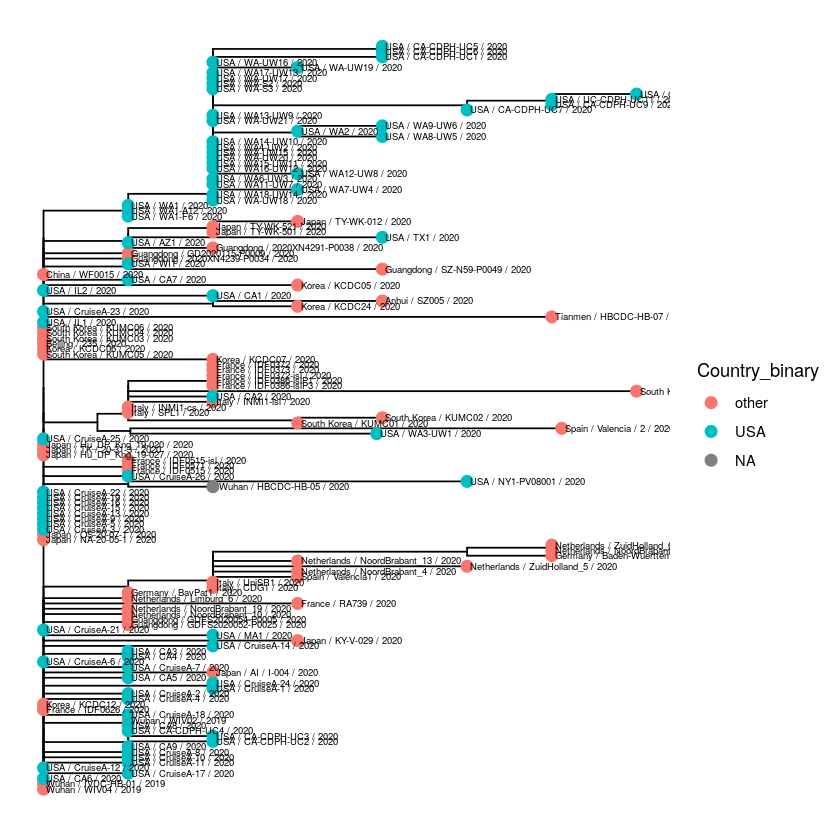

In [91]:
# loading metadata
md = read.csv("data/metadata/geo_loc.tsv",sep="\t")
md$Country_binary = ifelse(md$Country == "USA","USA","other")
md_sel=md[,c("Isolate_short_name","Country_binary")]

# displaying tree
library(ggtree)
g=ggtree(rtree) 
g %<+% md_sel + geom_tippoint(aes(color=Country_binary), size=3) + geom_tiplab(size=2)
g_final = g %<+% md_sel + geom_tippoint(aes(color=Country_binary), size=3) + geom_tiplab(size=3)
ggsave("out/tree_us_vs_other_isolates.pdf",g_final, height = 20 , width = 30)
 

Although the image in the notebook will be a bit difficult to read, the `.png` you can download/open the `.png` image we generated (`out/tree_us_vs_other_isolates.png`) with your favorite image viewer.

## Questions
- Can you list one or more examples of community spread?